In [3]:
# Reload magic
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from src.conductance import NMDAR, VGCC
from scripts.stdp_experimental_predictions import (
    show_nevian_reconstruction,
    show_plasticity_transfer_function, 
    show_estimated_plasticity,
    run_simulations,
)

# Define root path (of the full repo)
root_path = Path.cwd().parent

In [9]:
data = run_simulations(num_ap_amplitudes = 10)

C:\Users\Andrew\Documents\GitHub\plasticy-modeling\src\conductance.py:494: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(


In [10]:
np.stack(data["vgcc_ica"]).shape

(10, 500)

In [14]:
data["t_range"].shape

(500,)

In [12]:
len(data["vgcc_ica"][0])

500

0
1
2
3
4
5
6
7
8
9


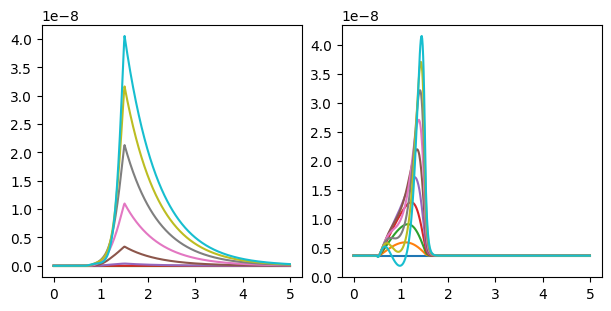

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), layout="constrained")
for i in range(len(data["vgcc_ica"])):
    ax[0].plot(data["t_range"], data["vgcc_ica"][i])
    ax[1].plot(data["t_range"], data["nmdar_ica"][i])
plt.show()

/usr/local/Caskroom/miniforge/base/envs/rl-playground/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


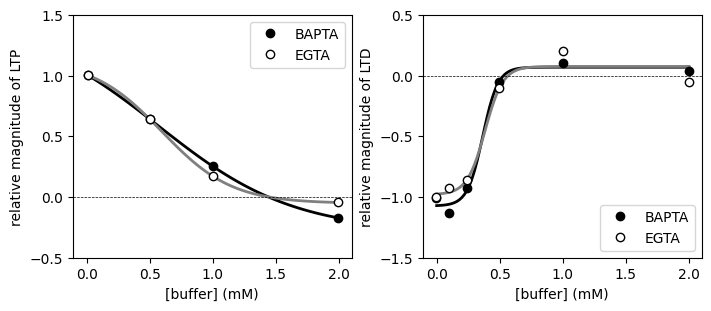

/usr/local/Caskroom/miniforge/base/envs/rl-playground/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


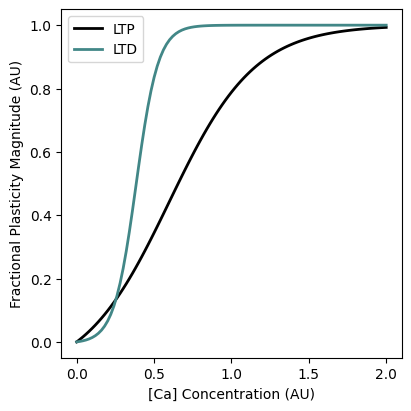

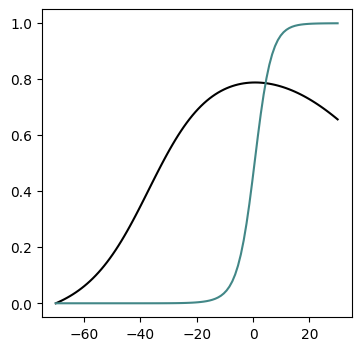

In [ ]:
fig = show_nevian_reconstruction(show_fig=True, save_fig=False)
# fig = show_plasticity_transfer_function(show_fig=True, save_fig=False)
fig = show_estimated_plasticity(data)

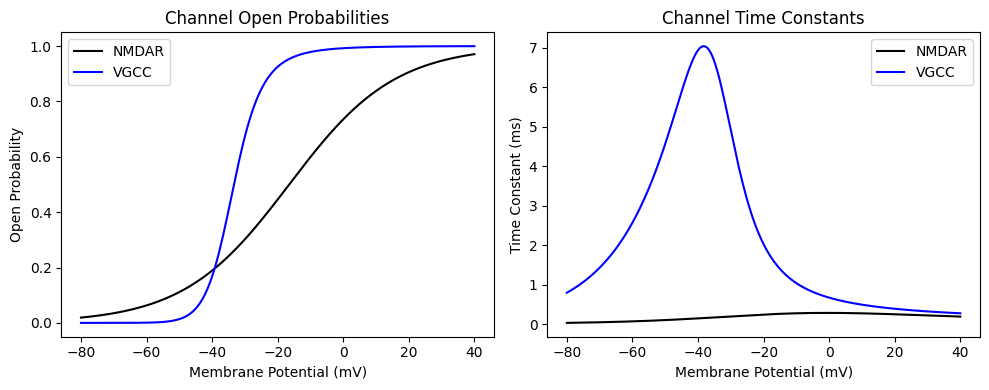

In [3]:
# Simulation parameters
v_range = np.linspace(-80, 40, 200)  # Voltage range for steady-state plots
dt = 0.01  # Time step for numerical integration (ms)
t_start = 0
t_end = 3
t_range = np.linspace(t_start, t_end, int((t_end - t_start) / dt))
ap_peak_time = 1  # Time of AP peak in ms
ap_amplitudes = np.linspace(10, 100, 10)  # AP amplitudes to test

# Initialize channels
nmdar = NMDAR()
vgcc = VGCC()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# Subplot 1: Open probabilities
ax1.plot(v_range, nmdar.open_probability(v_range), "k", label="NMDAR")
ax1.plot(v_range, vgcc.open_probability_activation(v_range), "b", label="VGCC")
ax1.set_xlabel("Membrane Potential (mV)")
ax1.set_ylabel("Open Probability")
ax1.set_title("Channel Open Probabilities")
ax1.legend()

# Subplot 2: Time constants
ax2.plot(v_range, nmdar.time_constant(v_range), "k", label="NMDAR")
tau_m, tau_h = vgcc.time_constant(v_range)
ax2.plot(v_range, tau_m, "b", label="VGCC")
ax2.set_xlabel("Membrane Potential (mV)")
ax2.set_ylabel("Time Constant (ms)")
ax2.set_title("Channel Time Constants")
ax2.legend()

plt.tight_layout()
plt.show()

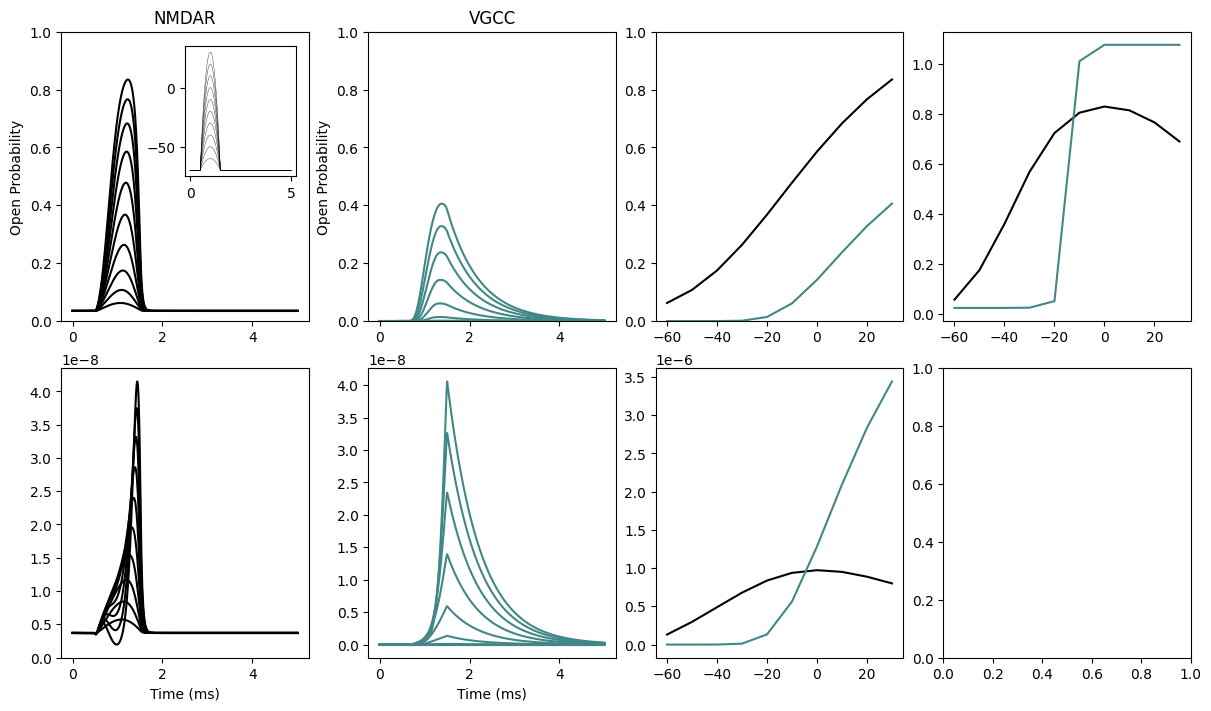

In [65]:
# Create figure: Response to action potentials
fig, ax = plt.subplots(2, 4, figsize=(12, 7), layout="constrained")
inset = ax[0, 0].inset_axes([0.5, 0.5, 0.45, 0.45])

ap_peaks = [np.max(v_trace) for v_trace in data["v_trace"]]

nmdar_color = "black"
vgcc_color = [x / 255 for x in [66, 135, 135]]

for iamplitude in range(len(data["ap_amplitudes"])):
    # Plot results
    inset.plot(data["t_range"], data["v_trace"][iamplitude], color="k", linewidth=0.25)

    ax[0, 0].plot(data["t_range"], data["nmdar_p"][iamplitude], color=nmdar_color)
    ax[0, 1].plot(data["t_range"], data["vgcc_p"][iamplitude], color=vgcc_color)

    ax[1, 0].plot(data["t_range"], data["nmdar_ica"][iamplitude], color=nmdar_color)
    ax[1, 1].plot(data["t_range"], data["vgcc_ica"][iamplitude], color=vgcc_color)

ax[0, 2].plot(ap_peaks, data["nmdar_peak_p"], color=nmdar_color, linewidth=1.5)
ax[0, 2].plot(ap_peaks, data["vgcc_peak_p"], color=vgcc_color, linewidth=1.5)
ax[1, 2].plot(ap_peaks, data["nmdar_integral_ca"], color=nmdar_color, linewidth=1.5)
ax[1, 2].plot(ap_peaks, data["vgcc_integral_ca"], color=vgcc_color, linewidth=1.5)

ax[0, 3].plot(ap_peaks, data["LTP"], color=nmdar_color, linewidth=1.5)
ax[0, 3].plot(ap_peaks, data["LTD"], color=vgcc_color, linewidth=1.5)

ax[0, 0].set_ylabel("Open Probability")
ax[0, 0].set_title("NMDAR")
ax[0, 1].set_ylabel("Open Probability")
ax[0, 1].set_title("VGCC")
ax[0, 0].set_ylim(0, 1)
ax[0, 1].set_ylim(0, 1)
ax[0, 2].set_ylim(0, 1)

ax[1, 0].set_xlabel("Time (ms)")
ax[1, 1].set_xlabel("Time (ms)")

plt.show()